Complete documentation: https://osf.io/4rd8g/
## **Priestley-Taylor**

| Method's input | Temp | ShortWave | LongWave | Net Radiation | Wind speed | Humidity | Soil flux | Pressure | Leaf area index | Water content |
| --- | --- | --- | --- | --- | --- | --- | --- | ---  | --- | --- |
| Priestley-Taylor | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $     \checkmark$  | $\times$ | $\times$ |
| Penman-Monteith FAO | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\times$ | $\checkmark$ |
| GEOframe | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\checkmark$ | $\checkmark$ |

| Method's input | Temp | ShortWave | LongWave | Net Radiation | Wind speed | Humidity | Soil flux | Pressure | Leaf area index | Water content |
| --- | --- | --- | --- | --- | --- | --- | --- | ---  | --- | --- |
| Priestley-Taylor | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $     \checkmark$  | $\times$ | $\times$ |
| Penman-Monteith FAO | $\checkmark$ | $\times$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\times$ | $\checkmark$ |
| GEOframe | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\times$ | $\checkmark$ | $\checkmark$ | $\checkmark$ | $\checkmark$  | $\checkmark$ | $\checkmark$ |


### **Component Description**
The GEOframe-NewAge ET component offers two different formulations for the evapotraspiration modeling: the FAO Penman-Monteith model and the Priestley Taylor model

\begin{equation}
ET_{0}^{PT} = \alpha\dfrac{\Delta\cdot (R_{n} - G)}{\Delta+\gamma}
\end{equation}
With:
\begin{equation}
 G =  \begin{cases}
   G_{morn}\cdot R_{n} \quad daylight\\G_{night}\cdot R_{n} \quad nighttime
   \end{cases} 
\end{equation}
where:
- $ET_{0}$ or $ET$ are expressed in [$mm \cdot day^{−1}$] or [$mm\cdot hour^{−1}$]; 
- $R_{n}$ is the net radiation expressed in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $G$ is the soil heat flux at the soil surface in [$MJ \cdot m^{2} \cdot day^{−1}$] or [$MJ \cdot m^{2}\cdot h^{−1}$]; 
- $\Delta$ is the slope of the saturation vapor-pressure curve expressed in ($kP_{a}\dot °C^{−1}$); 
- $\gamma$ is the psychometric constant expressed in ($kP_{a} \cdot$ °$C^{−1}$); 

### **Detailed Inputs description**
General description
The input file is a .csv file containing a header and one or more time series of input data,
depending on the number of stations involved. Each column of the file is associated to a
different station.
The file must have the following header:
- The first 3 rows with general information such as the date of the creation of the file and the author;
- The fourth and fifth rows contain the IDs of the stations (e.g. station number 8:value 8, ID, ,8);
- The sixth row contains the information about the type of the input data (in thiscase, one column with the date and one column with double values);
- The seventh row specifies the date format (YYYY-MM-dd HH:mm).


- #### **Net radiation**
The net radiation is given in time series of ($W/m^{2}$) values. The conversion from ($W/m^{2}$) to ($MJ\cdot m^{2}$) is automatically done by the component.
- #### **$G_{morn}$**
$G_{morn}$ is the coefficient for the soil heat flux during daylight
- #### **$G_{night}$**
$G_{night}$ is the coefficient for the soil heat flux during nighttime
- #### **doHourly**
doHourly is a boolean field to set the time step of the simulation (”true” is hourly time step, ”false” is daily).
- #### **Start Date**
Start Date is a string containing the first day of the simulation.
- #### **$\alpha$**
Parameter of the Priestley-Taylor equation. The mean value is 1.26. Adimensional


### **Detailed Outputs description**
The output file will have exactly the same heading of the input file. 
- #### **Time series of the latent heat (W/m$^{2}$)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.
- #### **Time series of the evapotranspiration (mm)**
The simulated output evapotranspiration is given as a time series at a given point. Its units are ($mm \cdot h^{−1}$) or ($mm \cdot day^{−1}$) depending on the temporal resolution chosen by the end-user.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
import os

In [9]:
###########################
### SET THE FOLDER PATH ###
###########################
projFolder = '/home/drugo/Sim/OMS_Project_ET/'

In [10]:
os.chdir(projFolder)

In [ ]:
# %load simulation/Evapotranspiration_PriestleyTaylor.sim
import static oms3.SimBuilder.instance as OMS3
def home = oms_prj

def startDate = "2006-07-01 00:00"
def endDate = "2006-07-31 23:30"
def timestep = 30
OMS3.sim {
	resource "$oms_prj/lib"    
	model(while:"readerAirTemperature.doProcess") {
		components {
			"readerAirTemperature"			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerNetRadiation"            "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerAtmosphericPressure"     "org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"
			"readerSoilHeatFlux"          	"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorReader"	
			"priestleyTaylor"               "etpPointCase.OmsPriestleyTaylor"     
			"writerLatentHeatPT"			"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"      
			"writerEvapotranspirationPT"	"org.jgrasstools.gears.io.timedependent.OmsTimeSeriesIteratorWriter"      			         
			}  
			parameter{        
				
				// PARAMETERS
				"priestleyTaylor.alpha"						1.26
		        "priestleyTaylor.soilFluxParameterDay"		0.35
		        "priestleyTaylor.soilFluxParameterNight"	0.75
        		"priestleyTaylor.doHourly"					true
        		"priestleyTaylor.defaultAtmosphericPressure"101.3
		        "priestleyTaylor.temporalStep"				"${timestep}"
        		"priestleyTaylor.tStartDate"				"${startDate}"
        		
        		// READERS
				"readerAirTemperature.file"					"${home}/data/Temp.csv"
				"readerAirTemperature.idfield"      		"val"  
				"readerAirTemperature.tStart"				"${startDate}"
				"readerAirTemperature.tEnd"					"${endDate}"
				"readerAirTemperature.tTimestep"			"${timestep}"
				"readerAirTemperature.fileNovalue"			"-9999"        
				
				"readerNetRadiation.file"          			"${home}/data/Net.csv"
				"readerNetRadiation.idfield"      			"val"
				"readerNetRadiation.tStart"        			"${startDate}"
				"readerNetRadiation.tEnd"					"${endDate}"
				"readerNetRadiation.tTimestep"				"${timestep}"
				"readerNetRadiation.fileNovalue"			"-9999"	
			
				"readerAtmosphericPressure.file"    		"${home}/data/Pres.csv"
				"readerAtmosphericPressure.idfield"     	"val"  
				"readerAtmosphericPressure.tStart"      	"${startDate}"
				"readerAtmosphericPressure.tEnd"        	"${endDate}"
				"readerAtmosphericPressure.tTimestep"   	"${timestep}"
				"readerAtmosphericPressure.fileNovalue" 	"-9999.0"       
				
				"readerSoilHeatFlux.file"         			"${home}/data/GHF.csv" 
				"readerSoilHeatFlux.idfield"      			"val"  
				"readerSoilHeatFlux.tStart"       			"${startDate}"
				"readerSoilHeatFlux.tEnd"         			"${endDate}"
				"readerSoilHeatFlux.tTimestep"    			"${timestep}"
				"readerSoilHeatFlux.fileNovalue"  			"-9999.0"                                                     
			
				// WRITERS
				"writerLatentHeatPT.file"					"${home}/output/Evapotranspiration_PriestleyTaylor/latentHeat_PT.csv" 
				"writerLatentHeatPT.tStart"					"${startDate}"
				"writerLatentHeatPT.tTimestep"				"${timestep}"
				
				"writerEvapotranspirationPT.file"			"${home}/output/Evapotranspiration_PriestleyTaylor/evapotranspiration_PT.csv" 
				"writerEvapotranspirationPT.tStart"			"${startDate}"
				"writerEvapotranspirationPT.tTimestep"		"${timestep}"
				}
				connect {                
					"readerAirTemperature.outData"			"priestleyTaylor.inAirTemperature"
					"readerNetRadiation.outData"			"priestleyTaylor.inNetRadiation"
					"readerAtmosphericPressure.outData"		"priestleyTaylor.inAtmosphericPressure"	
					"readerSoilHeatFlux.outData"			"priestleyTaylor.inSoilFlux"	
					"priestleyTaylor.outLatentHeatPt"		"writerLatentHeatPT.inData"
					"priestleyTaylor.outEvapotranspirationPt""writerEvapotranspirationPT.inData"
					}					
			}
	}




In [12]:
# !docker run --rm -it -v $(pwd):/work omslab/oms simulation/Evapotranspiration_PriestleyTaylor.sim

**Read the Priestley-Taylor output**

In [38]:
nameETPTFile = 'output/Evapotranspiration_PriestleyTaylor/latentHeat_PT.csv'

In [39]:
df = pd.read_csv('output/Evapotranspiration_PriestleyTaylor/evapotranspiration_PT.csv',
                 skiprows=6, sep=',', parse_dates=[0], 
                 na_values=-9999,usecols=[1,2])
df.columns = ['Datetime','Et pt']
df.index = df['Datetime']
df = df.iloc[:,1:]
df.head(3)

,Et pt
Datetime,
2006-07-01 00:00:00,0.0
2006-07-01 00:30:00,0.0
2006-07-01 01:00:00,0.0


In [40]:
df.describe()

,Et pt
count,1473.000000
mean,0.106799
std,0.140714
min,0.000000
25%,0.000000
50%,0.008187
75%,0.211855
max,0.524667


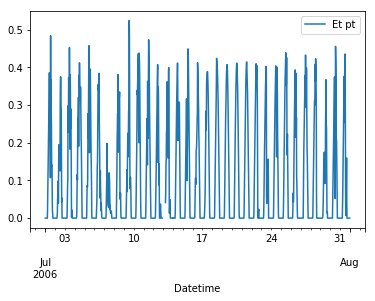

In [41]:
df.plot()

In [42]:
mask = (df.index > '2006-07-01 00:00:00') & (df.index < '2006-07-01 23:00:00')
dfDay = df.iloc[mask]
dfDay.tail()

,Et pt
Datetime,
2006-07-01 20:30:00,0.0
2006-07-01 21:00:00,0.0
2006-07-01 21:30:00,0.0
2006-07-01 22:00:00,0.0
2006-07-01 22:30:00,0.0


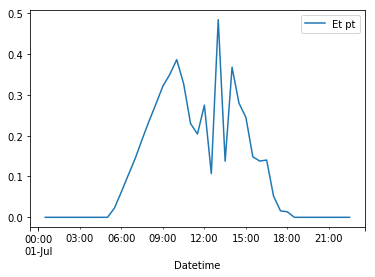

In [43]:
dfDay.plot()